<a href="https://colab.research.google.com/github/Gr3gP/Misc-Projects/blob/main/BitcoinPrice_TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
btcprice_df = pd.read_csv('/content/drive/MyDrive/bitcoin_price.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
btcprice_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,"Feb 19, 2018",10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,"Feb 18, 2018",11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,"Feb 17, 2018",10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,"Feb 16, 2018",10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


In [ ]:
btcprice_df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [ ]:
btcprice_df.max()

Date            Sep 30, 2017
Open                 19475.8
High                   20089
Low                  18974.1
Close                19497.4
Volume           994,625,000
Market Cap    99,941,600,000
dtype: object

In [ ]:
btcprice_df.min()

Date           Apr 01, 2014
Open                   68.5
High                  74.56
Low                   65.53
Close                 68.43
Volume                    -
Market Cap    1,000,070,000
dtype: object

In [ ]:
btcprice_df['Date'] = pd.date_range(start='2014-04-01', periods=1760)

In [ ]:
import matplotlib.pyplot as plt

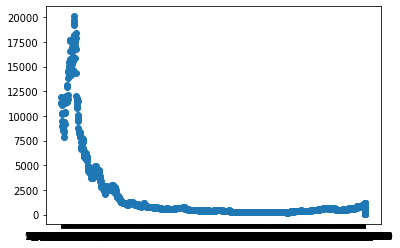

In [ ]:
plt.scatter(btcprice_df.Volume, btcprice_df.High)
plt.show()

In [ ]:
from datetime import datetime
import datetime as dt

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

X = pd.DataFrame(pd.to_numeric(btcprice_df['Date']))
Y = btcprice_df['Close']
lm.fit(X,Y)
lm.score(X,Y)

0.3185719202910684

In [ ]:
lm.coef_[0] * 1000000000 * 24 * (60**2)

-3.2865654514630096

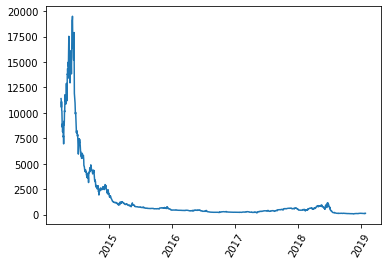

In [ ]:
plt.plot(btcprice_df.Date, btcprice_df.Close)
plt.xticks(rotation=60)
plt.show()

In [ ]:
btcprice_df['day_of_week'] = btcprice_df.Date.apply(lambda x: str(datetime.weekday(x)))

X = pd.get_dummies(btcprice_df.day_of_week)
X['Date'] = pd.to_numeric(btcprice_df.Date) / 1000000000 * 24 * (60**2)
Y = btcprice_df['Close']
lm.fit(X,Y)
lm.score(X,Y)

0.3185787064836917

In [ ]:
print(X.columns)
print(lm.coef_)

Index(['0', '1', '2', '3', '4', '5', '6', 'Date'], dtype='object')
[-1.39522339e+01  3.96921336e+00  6.52920398e+00  1.15701472e+00
  1.09790680e+01 -2.99797260e+00 -5.68433770e+00 -4.40262937e-10]


In [ ]:
X['cos_date'] = np.cos((X.Date - 1760) * np.pi / 3.5)
Y = btcprice_df['Close']
lm.fit(X,Y)
lm.score(X,Y)

0.3186412270431185

In [ ]:
lm.coef_

array([ 3.02900887e+03, -1.05507965e+03, -4.35663807e+03, -4.37951883e+03,
       -1.08979633e+03,  3.00455388e+03,  4.84741344e+03, -4.40422809e-10,
       -4.85298205e+03])

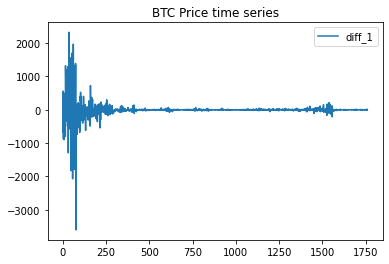

In [ ]:
btcprice_df['diff_1'] = btcprice_df.Close - btcprice_df.Close.shift()
btcprice_df.plot(y='diff_1')
plt.title('BTC Price time series')
plt.show()

We can see that the series starts out random but then tends to become less random

Text(0.5, 1.0, 'S&P PACF')

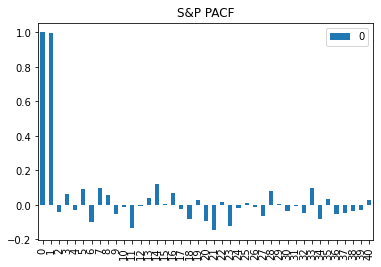

In [ ]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(btcprice_df.Close))
x_acf.plot(kind='bar')
plt.title('S&P PACF')

Here the PACF appears to have the first two periods very close to each other

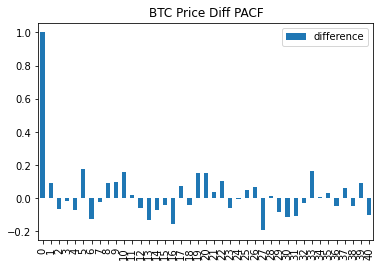

In [ ]:
x_acf = pd.DataFrame(pacf(btcprice_df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title('BTC Price Diff PACF')
plt.legend(['difference'])

In the difference PACF, the second period has fallen massively, leaving the first difference very high.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(btcprice_df.Close, order=(0,1,0))
model_fit_010 = model.fit()
print(model_fit_010.summary())
print('residuals description')
print(model_fit_010.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1759
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -12057.949
Method:                           css   S.D. of innovations            229.537
Date:                Fri, 22 Jan 2021   AIC                          24119.898
Time:                        14:00:17   BIC                          24130.843
Sample:                             1   HQIC                         24123.943
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4068      5.473     -1.171      0.242     -17.133       4.320
residuals description
count    1.759000e+03
mean    -2.470136e-15
std      2.296022e+02
min     -3.601793e+03
25%     -2.988240e+00

p-value not significant, AI and BIC are very high((24k)

In [ ]:
model = ARIMA(btcprice_df.Close, order=(1,0,0))
model_fit_100 = model.fit()
print(model_fit_100.summary())
print('residuals description')
print(model_fit_100.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1760
Model:                     ARMA(1, 0)   Log Likelihood              -12068.165
Method:                       css-mle   S.D. of innovations            229.589
Date:                Fri, 22 Jan 2021   AIC                          24142.330
Time:                        14:00:32   BIC                          24158.749
Sample:                             0   HQIC                         24148.398
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2303.8908   3074.748      0.749      0.454   -3722.505    8330.287
ar.L1.Close     0.9987      0.001    746.825      0.000       0.996       1.001
                                    Roots       

constant not significant, AIC and BIC also high(24k)

In [ ]:
model = ARIMA(btcprice_df.Close, order=(1,0,1))
model_fit_101 = model.fit()
print(model_fit_101.summary())
print('residuals description')
print(model_fit_101.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1760
Model:                     ARMA(1, 1)   Log Likelihood              -12059.180
Method:                       css-mle   S.D. of innovations            228.426
Date:                Fri, 22 Jan 2021   AIC                          24126.361
Time:                        14:00:45   BIC                          24148.253
Sample:                             0   HQIC                         24134.451
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2794.9440   2640.501      1.058      0.290   -2380.342    7970.230
ar.L1.Close     0.9982      0.002    652.483      0.000       0.995       1.001
ma.L1.Close     0.1069      0.025      4.258    

In [ ]:
model = ARIMA(btcprice_df.Close, order=(1,1,1))
model_fit_111 = model.fit()
print(model_fit_111.summary())
print('residuals description')
print(model_fit_111.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1759
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12036.324
Method:                       css-mle   S.D. of innovations            226.728
Date:                Fri, 22 Jan 2021   AIC                          24080.648
Time:                        14:00:57   BIC                          24102.538
Sample:                             1   HQIC                         24088.738
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.3763      5.762     -1.107      0.269     -17.670       4.917
ar.L1.D.Close    -0.7045      0.054    -12.946      0.000      -0.811      -0.598
ma.L1.D.Close     0.8168      0.043     

In [ ]:
model = ARIMA(btcprice_df.Close, order=(3,1,3))
model_fit_313 = model.fit()
print(model_fit_313.summary())
print('residuals description')
print(model_fit_313.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1759
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -12002.047
Method:                       css-mle   S.D. of innovations            222.253
Date:                Fri, 22 Jan 2021   AIC                          24020.095
Time:                        14:01:12   BIC                          24063.875
Sample:                             1   HQIC                         24036.275
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.4128      6.351     -1.010      0.313     -18.860       6.035
ar.L1.D.Close    -0.7929      0.106     -7.504      0.000      -1.000      -0.586
ar.L2.D.Close     0.5392      0.175     

Text(0.5, 1.0, 'histogram of residuals')

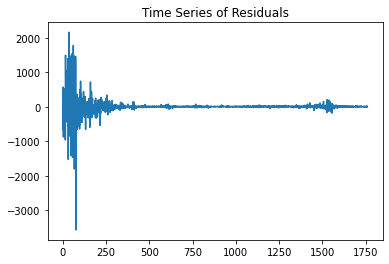

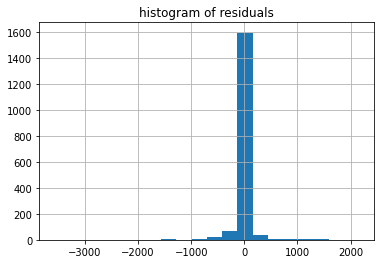

In [ ]:
residuals = pd.DataFrame(model_fit_313.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('histogram of residuals')

In [ ]:
AIC_ratio = np.exp((model_fit_313.aic - model_fit_010.aic) / 2)
print(AIC_ratio)

2.1285013546275783e-22


In [ ]:
AIC_ratio_313_010 = np.exp(24020 - 24191)/2
print(AIC_ratio_313_010)

2.7202799396293265e-75


Looking at the above models, we will evaluate them based on log-likelihood, coefficient p-values, and residuals

**Log-Likelihood:**

All of the LL's are negative for our models. This means the likelihood of our models generating the data we see is very low. The ARIMA(1,0,0) model performed the best based on this metric.

**P-values:**

Our p-values for almost all our models coefficients are significant. The only one that are not are our models constants.

**Residuals:**

Looking at the above visuals, we can see the residuals are not really normally distributed at all. There are far two many data points centered around the mean.

When we look at the AIC Ratio however, we can see that out ARIMA(3,1,3) model explains far more than the ARIMA(1,0,0) model.

